In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore')

In [22]:
data_path = '../1.data/'
train_file_name = 'train.csv'
test_file_name  = 'test.csv'

In [23]:
train_df = pd.read_csv(f'{data_path}{train_file_name}')
train_df.head()

,id,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price
0,0,nashville,1949,bmw,excellent,6 cylinders,gas,115148,clean,manual,rwd,mid-size,convertible,orange,NaN,27587
1,1,state college,2013,toyota,fair,8 cylinders,gas,172038,clean,automatic,rwd,full-size,sedan,silver,pa,4724
2,2,wichita,1998,ford,good,6 cylinders,gas,152492,clean,automatic,fwd,full-size,SUV,silver,ks,10931
3,3,albany,2014,ford,excellent,4 cylinders,gas,104118,clean,manual,fwd,mid-size,SUV,blue,ny,16553
4,4,redding,2005,ford,excellent,6 cylinders,gas,144554,clean,manual,fwd,mid-size,sedan,red,ca,5158


In [24]:
non_cols = ['id']
num_cols = ['year', 'odometer']
cat_cols = [col for col in train_df.columns if col not in non_cols + num_cols]

In [25]:
# エラーデータ処理
is_error_year = train_df['year'] > 2023
train_df.loc[is_error_year, 'year'] = train_df[is_error_year]['year'] - 1000

size_replace = \
    {'fullーsize':'full-size', 'midーsize':'mid-size', 
     'fullーsize':'full-size', 'subーcompact':'sub-compact', 
     'mid−size':'mid-size', 'full−size':'full-size'}
train_df['size'] = train_df['size'].replace(size_replace)

manufactuer_replace = {
    'ｂｍｗ':'bmw', 'BMW':'bmw', 'ＢＭＷ':'bmw',
    'TOYOTA':'toyota', 'ＴＯＹＯＴＡ':'toyota', 'ｔｏｙｏｔａ':'toyota', 'toyotа':'toyota',
    'ｆｏｒｄ':'ford', 'FORD':'ford', 'ＦＯＲＤ':'ford',
    'NISSAN':'nissan', 'ＮＩＳＳＡＮ':'nissan', 'ｎｉｓｓａｎ':'nissan', 'nisѕan':'nissan', 'niѕsan':'nissan',
    'ＶＯＬＫＳＷＡＧＥＮ':'volkswagen', 'ｖｏｌｋｓｗａｇｅｎ':'volkswagen', 'VOLKSWAGEN':'volkswagen', 'vоlkswagen':'volkswagen',
    'CHEVROLET':'chevrolet', 'ｃｈｅｖｒｏｌｅｔ':'chevrolet', 'ＣＨＥＶＲＯＬＥＴ':'chevrolet',
    'RAM':'ram', 'ｒａｍ':'ram', 'ＲＡＭ':'ram', 
    'GMC':'gmc', 'ｇｍｃ':'gmc',
    'BUICK':'buick', 'ｂｕｉｃｋ':'buick', 'ＢＵＩＣＫ':'buick',
    'MERCEDES-BENZ':'mercedes-benz', 'ｍｅｒｃｅｄｅｓ－ｂｅｎｚ':'mercedes-benz',
    'HONDA':'honda', 'ｈｏｎｄａ':'honda',
    'ACURA':'acura', 'ＡＣＵＲＡ':'acura', 'ａｃｕｒａ':'acura', 'аcura':'acura',
    'MINI':'mini', 'ＭＩＮＩ':'mini',
    'KIA':'kia', 'ｋｉａ':'kia',
    'ｍａｚｄａ':'mazda', 'MAZDA':'mazda', 'ＭＡＺＤＡ':'mazda',
    'SUBARU':'subaru', 'ｓｕｂａｒｕ':'subaru', 'SUBΑRU':'subaru', 'ＳＵＢＡＲＵ':'subaru',
    'LEXUS':'lexus', 'ｌｅｘｕｓ':'lexus', 'lexuѕ':'lexus',
    'DODGE':'dodge', 'ｄｏｄｇｅ':'dodge', 'ＤＯＤＧＥ':'dodge', 
    'HYUNDAI':'hyundai', 'ｈｙｕｎｄａｉ':'hyundai', 'ＨＹＵＮＤＡＩ':'hyundai',
    'INFINITI':'infiniti', 'ｉｎｆｉｎｉｔｉ':'infiniti', 
    'CADILLAC':'cadillac', 'ｃａｄｉｌｌａｃ':'cadillac', 'ＣＡＤＩＬＬＡＣ':'cadillac',
    'JEEP':'jeep', 'ｊｅｅｐ':'jeep', 'ＪＥＥＰ':'jeep',
    'LINCOLN':'lincoln',
    'AUDI':'audi', 'ａｕｄｉ':'audi', 
    'MERCURY':'mercury', 'ｍｅｒｃｕｒｙ':'mercury', 'ＭＥＲＣＵＲＹ':'mercury',
    'ROVER':'rover',
    'ｖｏｌｖｏ':'volvo',
    'JAGUAR':'jaguar',
    'SATURN':'saturn', 'ｓａｔｕｒｎ':'saturn', 'SΑTURN':'saturn',
    'CHRYSLER':'chrysler', 'ｃｈｒｙｓｌｅｒ':'chrysler', 'ᴄhrysler':'chrysler',
    'PONTIAC':'pontiac', 'ｐｏｎｔｉａｃ':'pontiac',
    'ｍｉｔｓｕｂｉｓｈｉ':'mitsubishi', 'MITSUBISHI':'mitsubishi', 'ＭＩＴＳＵＢＩＳＨＩ':'mitsubishi',
    'VOLVO':'volvo',
    'FIAT':'fiat',

}

train_df['manufacturer'] = train_df['manufacturer'].replace(manufactuer_replace)

<AxesSubplot:>

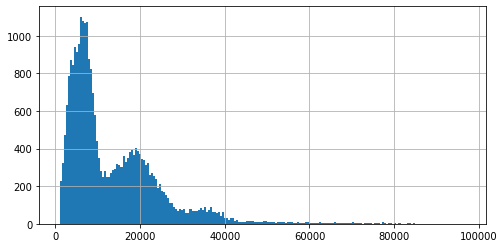

In [26]:
# 3つに分けられそう
plt.figure(figsize=(8,4))
train_df['price'].hist(bins=200)

<AxesSubplot:>

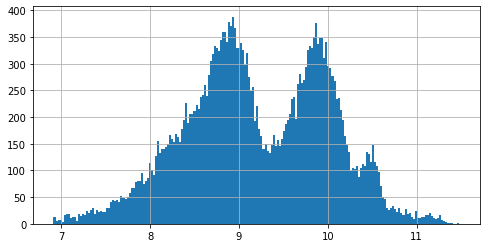

In [27]:
plt.figure(figsize=(8,4))
np.log(train_df['price']).hist(bins=200)

In [28]:
train_df = train_df[train_df['price']<=60000]

In [29]:
def plot_bar_box_set(f_col, tmp_train_df, fs):
    global f_plot
    tmp_train_df['count'] = tmp_train_df.groupby(f_col)['price'].transform('count')
    tmp_train_df = tmp_train_df.sort_values('count')
    f_plot = tmp_train_df[f_col].unique()

    if tmp_train_df[f_col].nunique() > 50:
        f_plot = tmp_train_df.groupby(f_col)['price'].count() \
                .sort_values().reset_index().tail(50) \
                [f_col].values
        tmp_train_df = tmp_train_df[tmp_train_df[f_col].isin(f_plot)]

    plt.figure(figsize=fs)
    ax = sns.boxplot(x=f_col, y='price', data=tmp_train_df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    ax.set_ylim([0, 60000])

    plt.figure(figsize=fs)
    tmp_train_df.groupby(f_col)['price'].count().sort_values().plot.bar()


def cat_hist_plot(f_col, p_range):
    index = 0
    x_axis_n = 8
    y_axis_n = train_df[f_col].nunique() // x_axis_n + 1
    fig = plt.figure(figsize=(30,4*y_axis_n))

    for grp, grp_df in train_df.groupby(f_col):
        if grp not in f_plot:
            continue
        index += 1
        axis = fig.add_subplot(y_axis_n+1, x_axis_n, index)
        axis.set_title(grp)
        axis.set_xlim([0,60000])
        axis.set_ylim(p_range)
        grp_df['price'].hist(ax=axis, bins=50)


def plot_box_bar_hist(f_col, train_df, fs=(20,3), p_range=[0,200]):
    plot_bar_box_set(f_col, train_df, fs)
    cat_hist_plot(f_col, p_range)

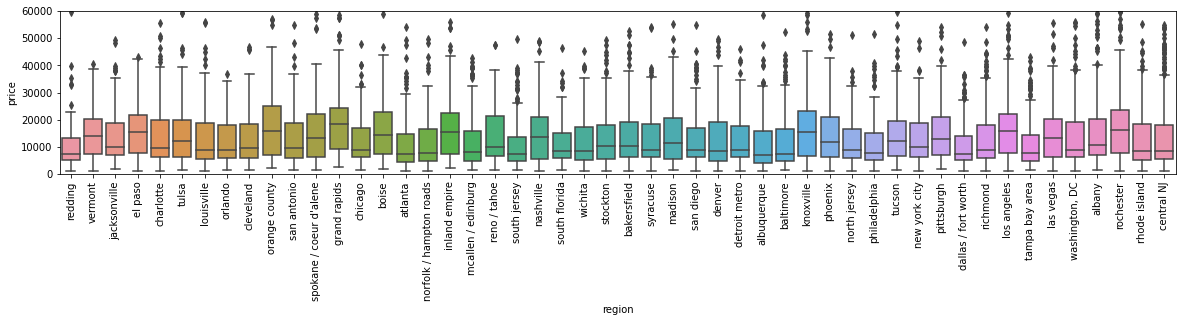

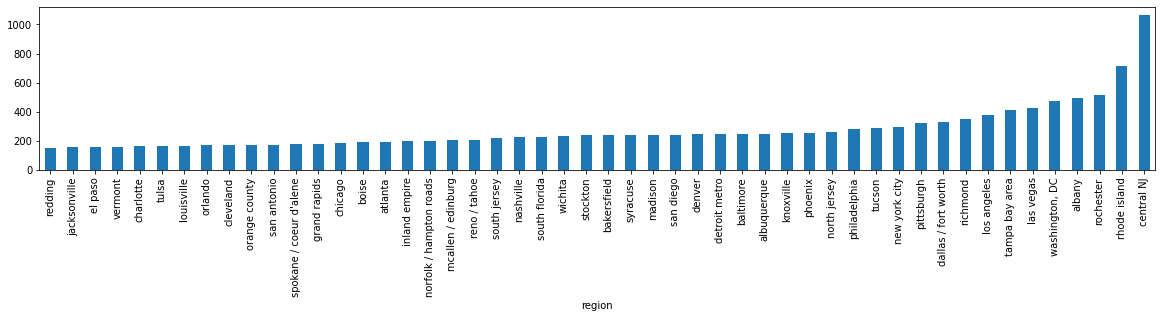

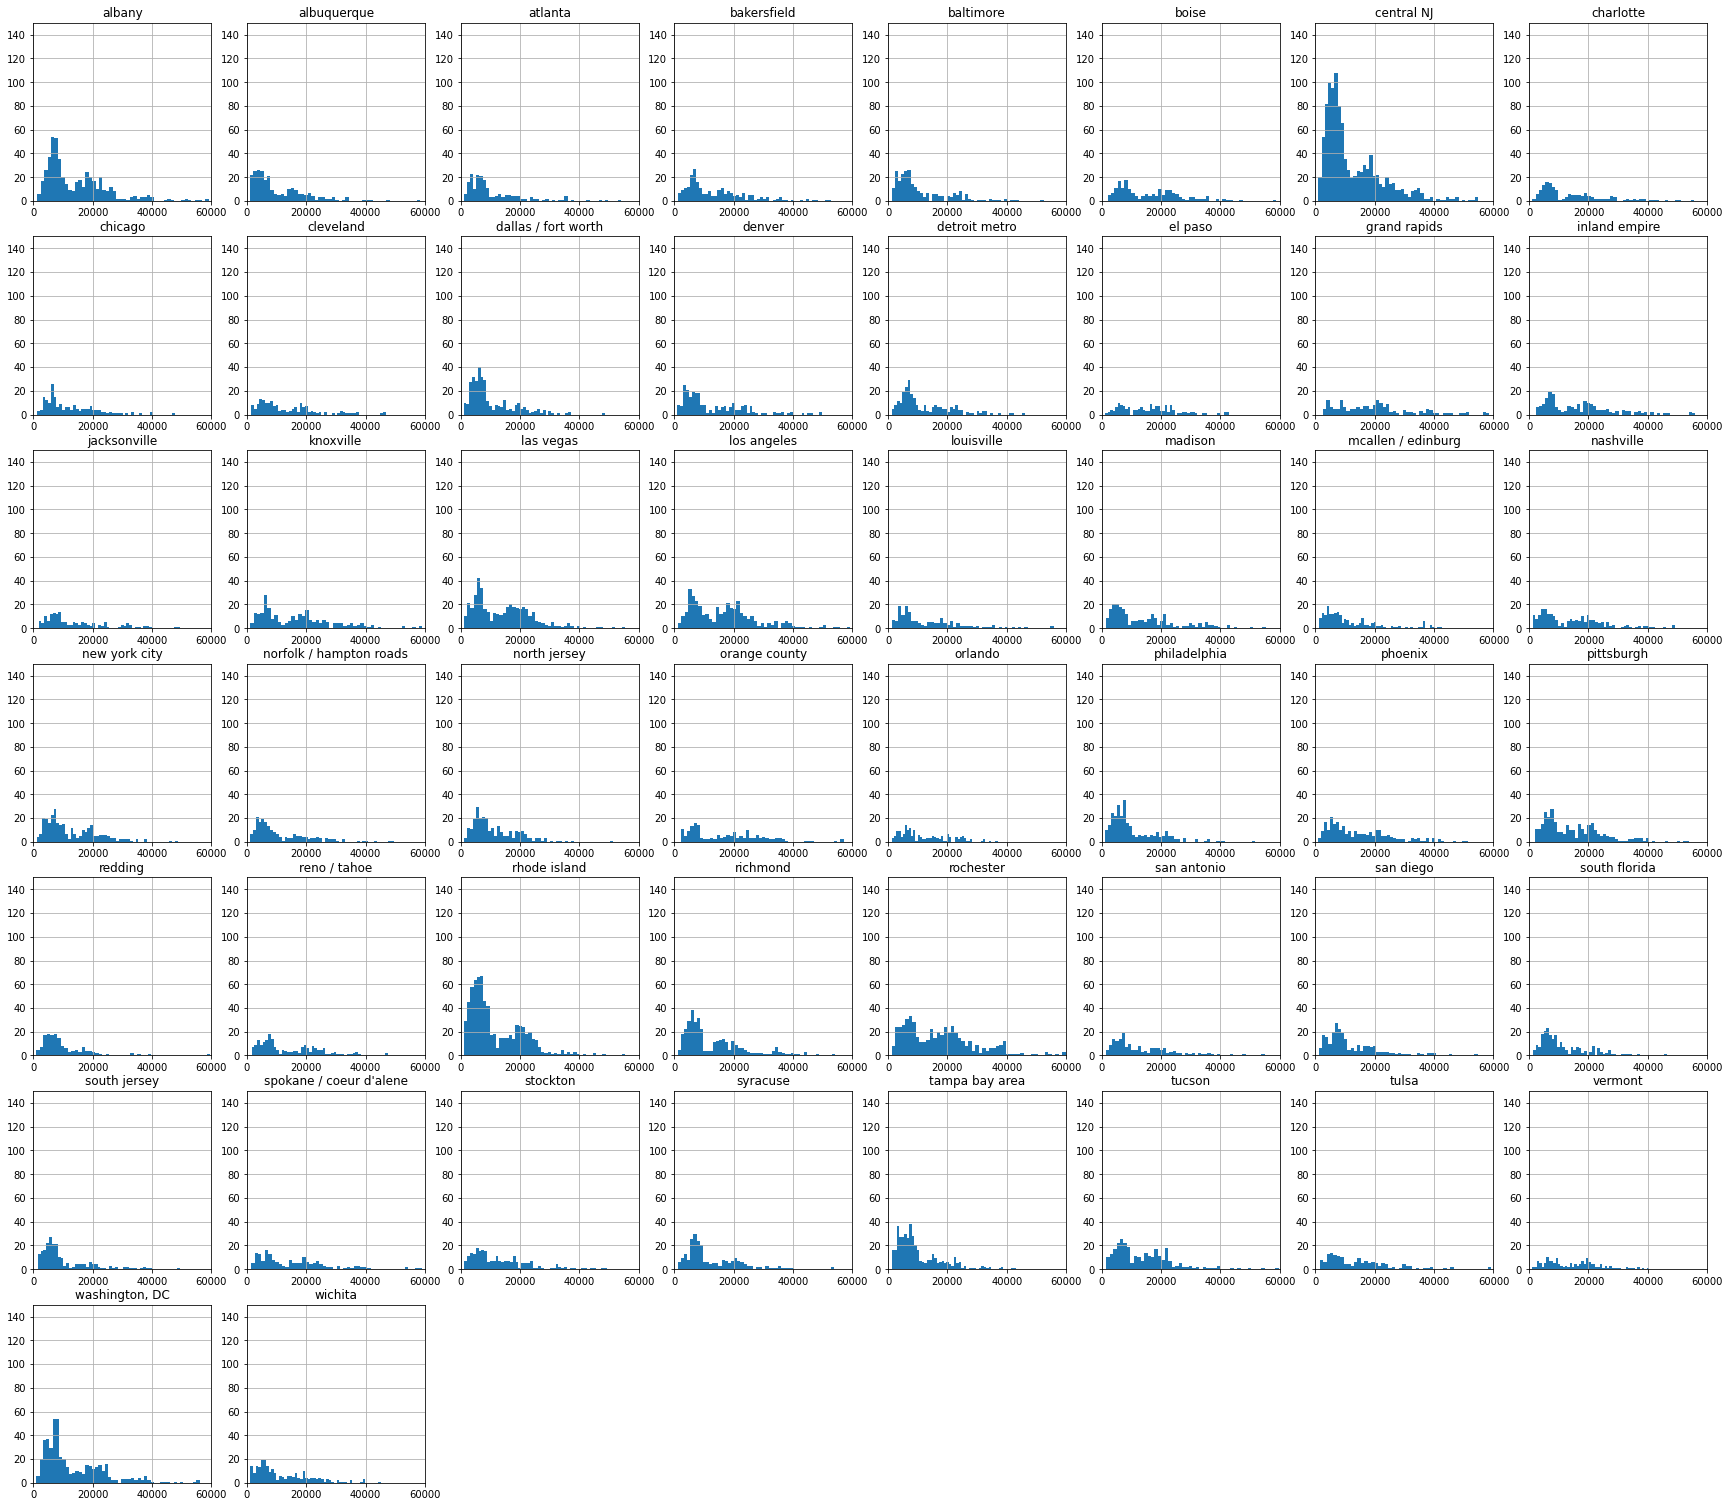

In [30]:
plot_box_bar_hist('region', train_df, p_range=[0,150])

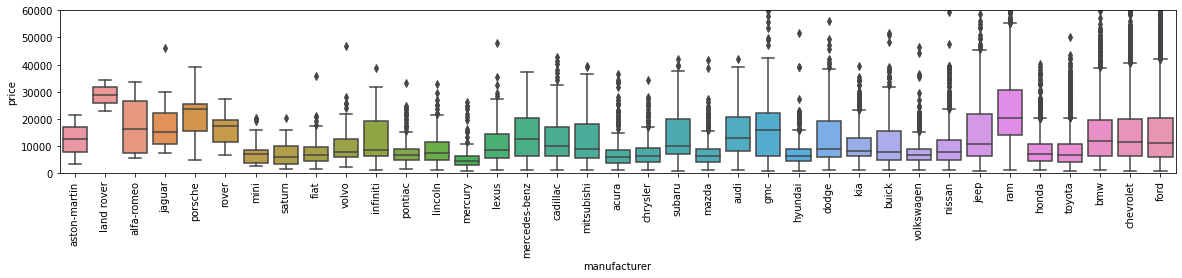

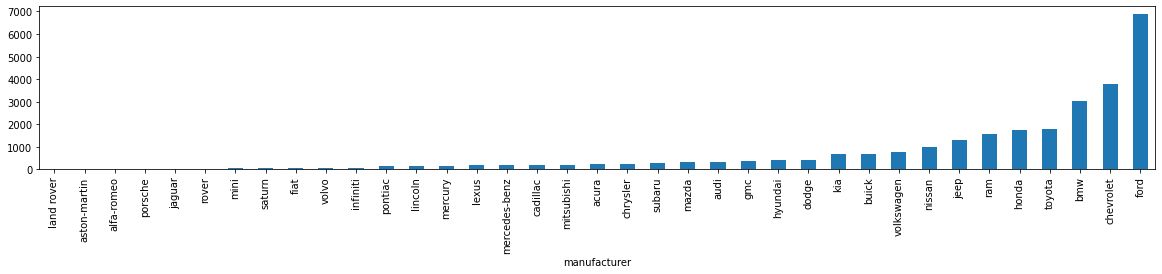

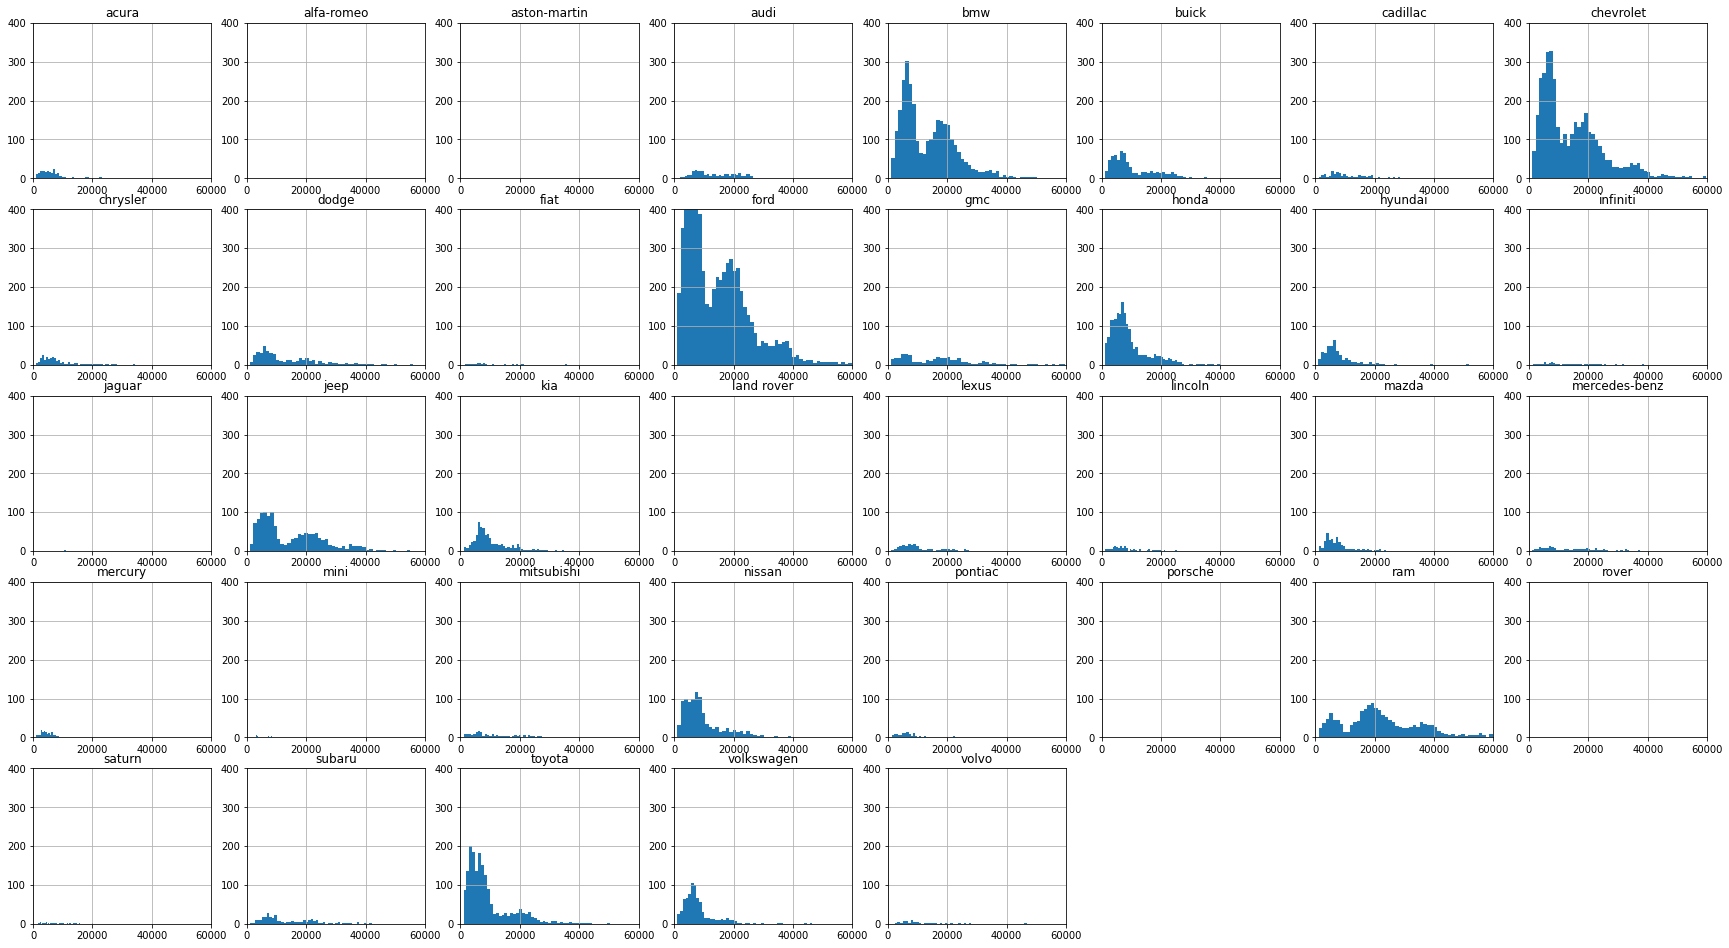

In [31]:
plot_box_bar_hist('manufacturer', train_df, p_range=[0,400])

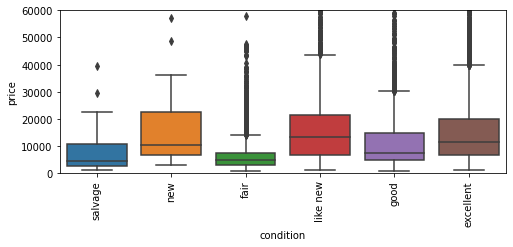

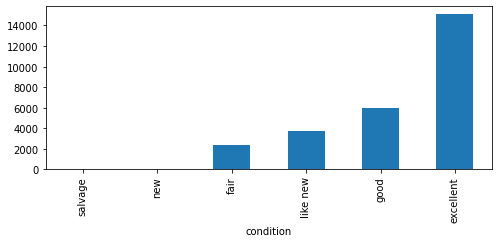

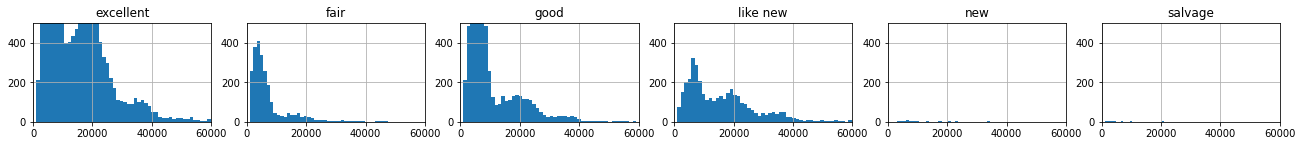

In [32]:
plot_box_bar_hist('condition', train_df, fs=(8,3), p_range=[0,500])

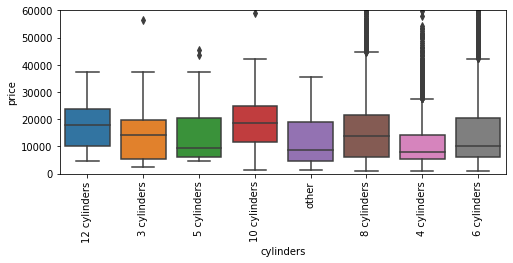

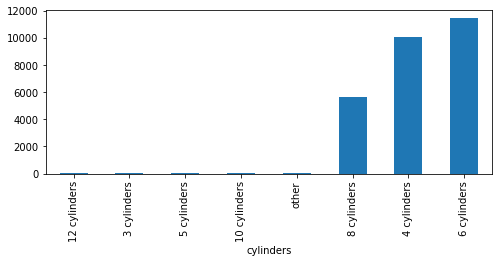

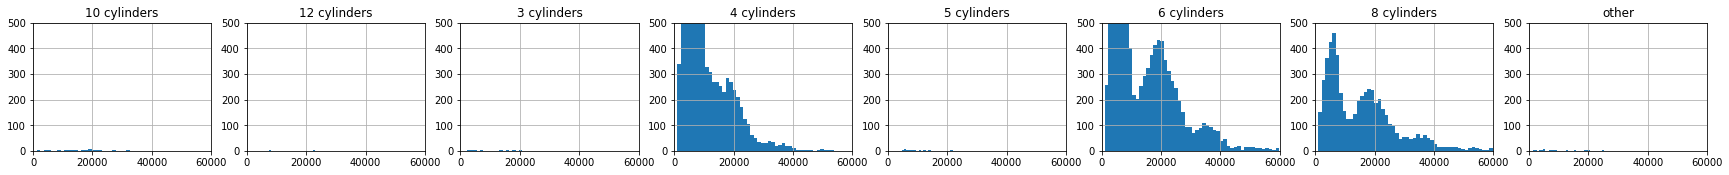

In [33]:
plot_box_bar_hist('cylinders', train_df, (8, 3), p_range=[0,500])

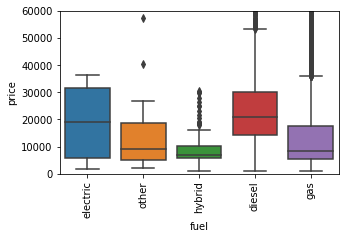

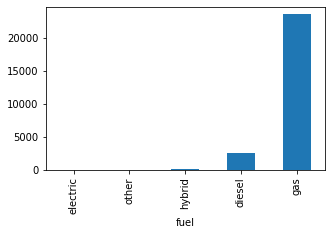

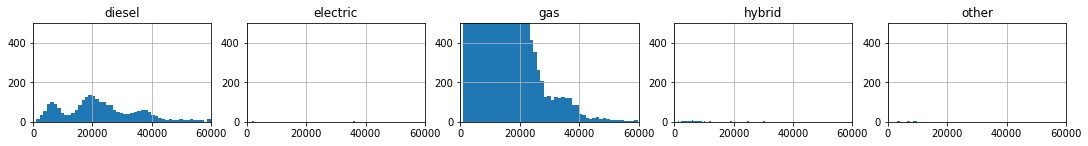

In [34]:
plot_box_bar_hist('fuel', train_df, (5, 3), p_range=[0,500])

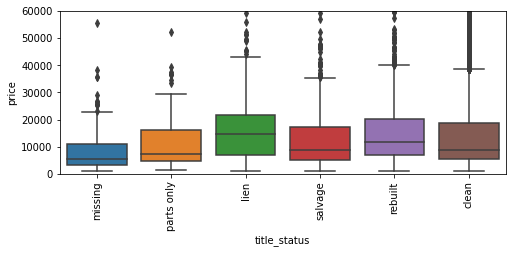

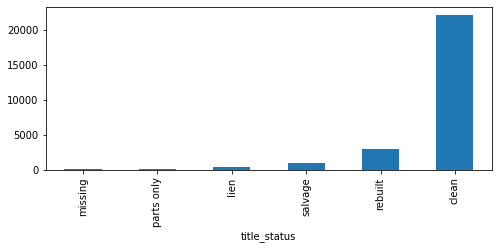

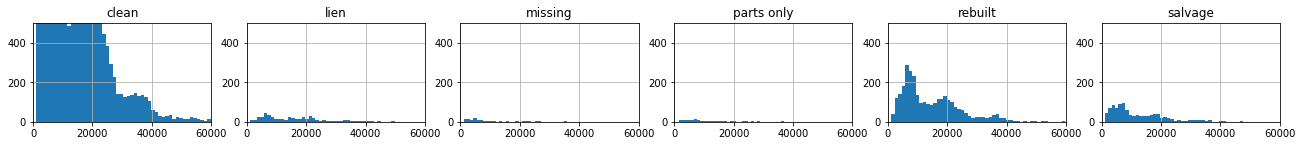

In [35]:
plot_box_bar_hist('title_status', train_df, (8, 3), p_range=[0,500])

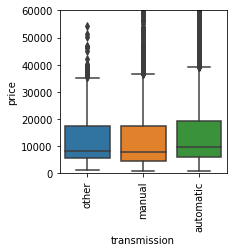

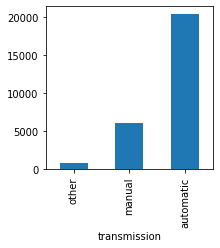

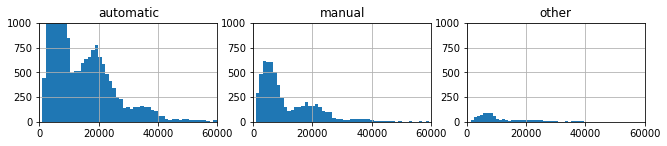

In [36]:
plot_box_bar_hist('transmission', train_df, (3, 3), p_range=[0,1000])

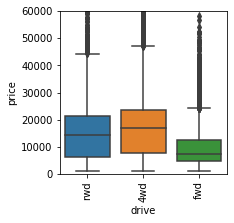

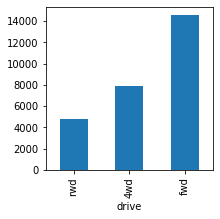

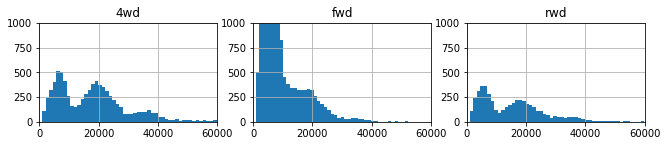

In [37]:
plot_box_bar_hist('drive', train_df, (3, 3), p_range=[0,1000])

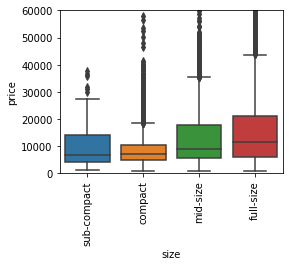

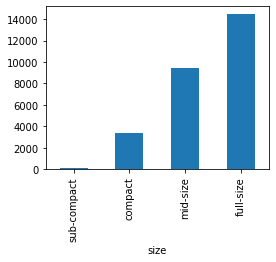

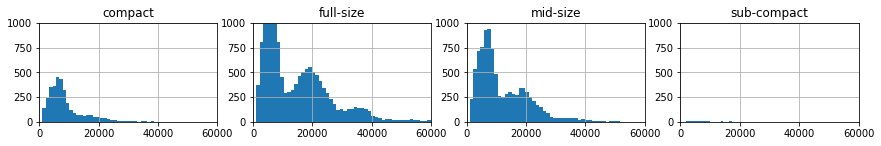

In [38]:
plot_box_bar_hist('size', train_df, (4, 3), p_range=[0,1000])

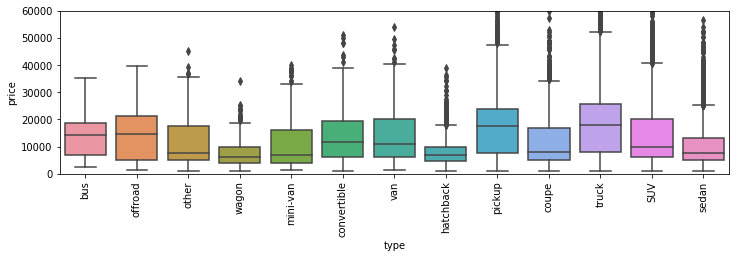

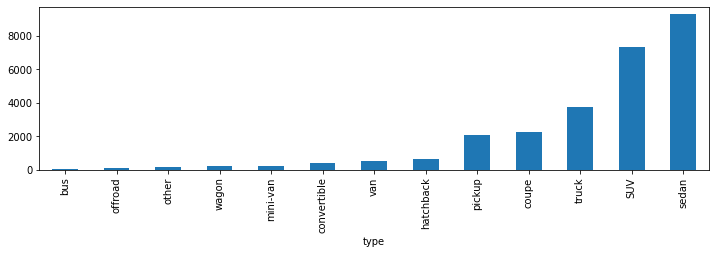

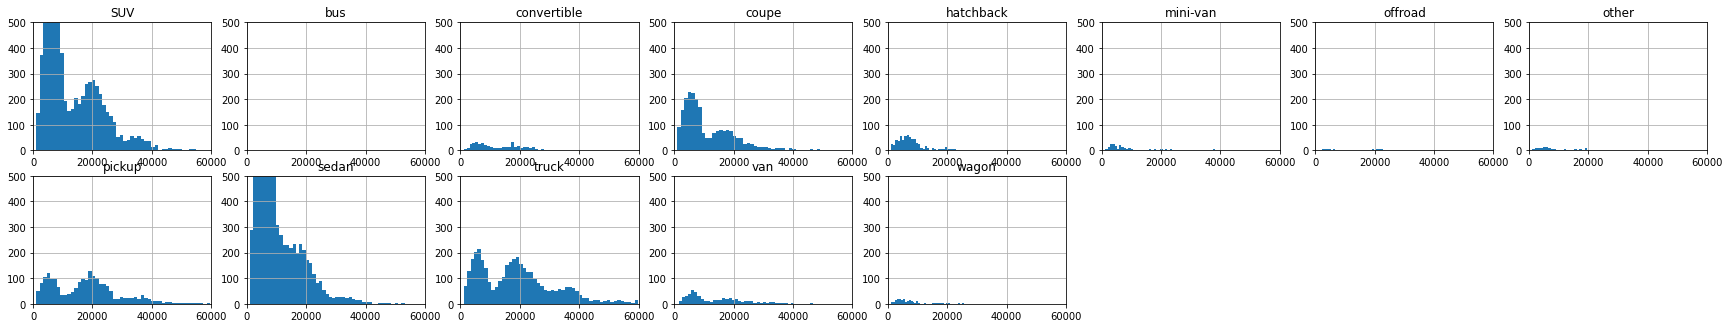

In [39]:
plot_box_bar_hist('type', train_df, (12, 3), p_range=[0,500])

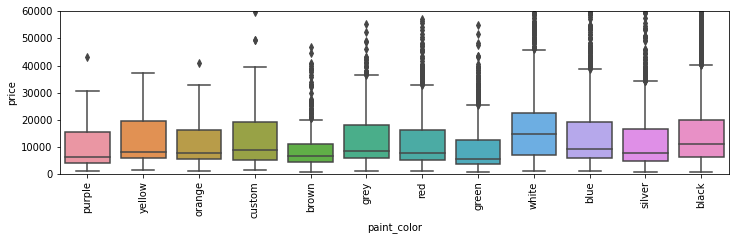

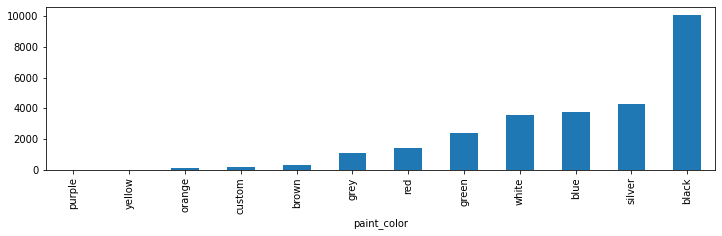

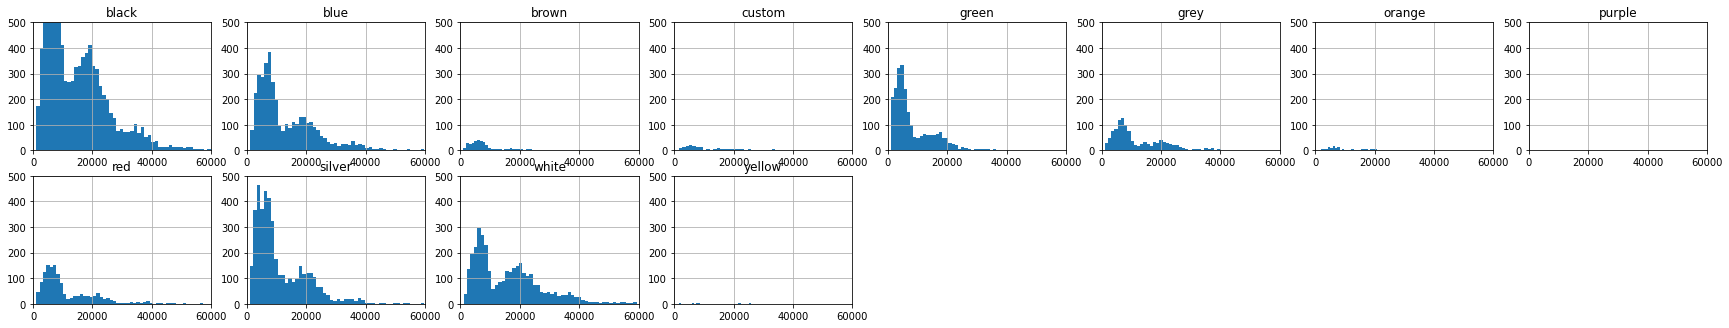

In [40]:
plot_box_bar_hist('paint_color', train_df, (12, 3), p_range=[0,500])

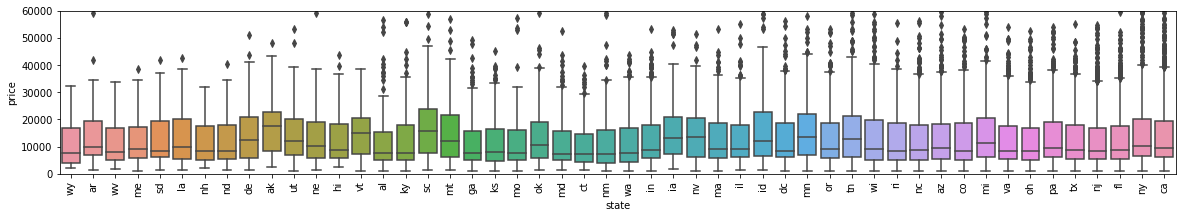

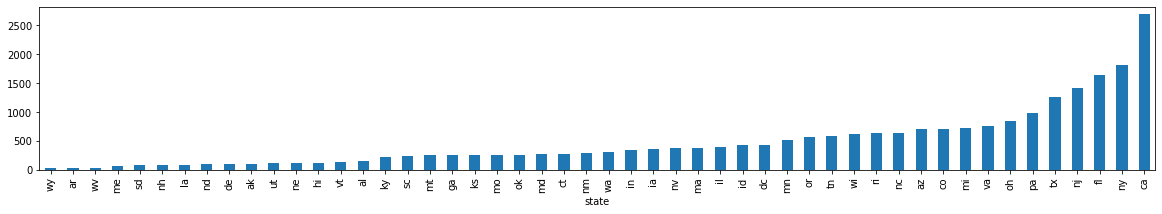

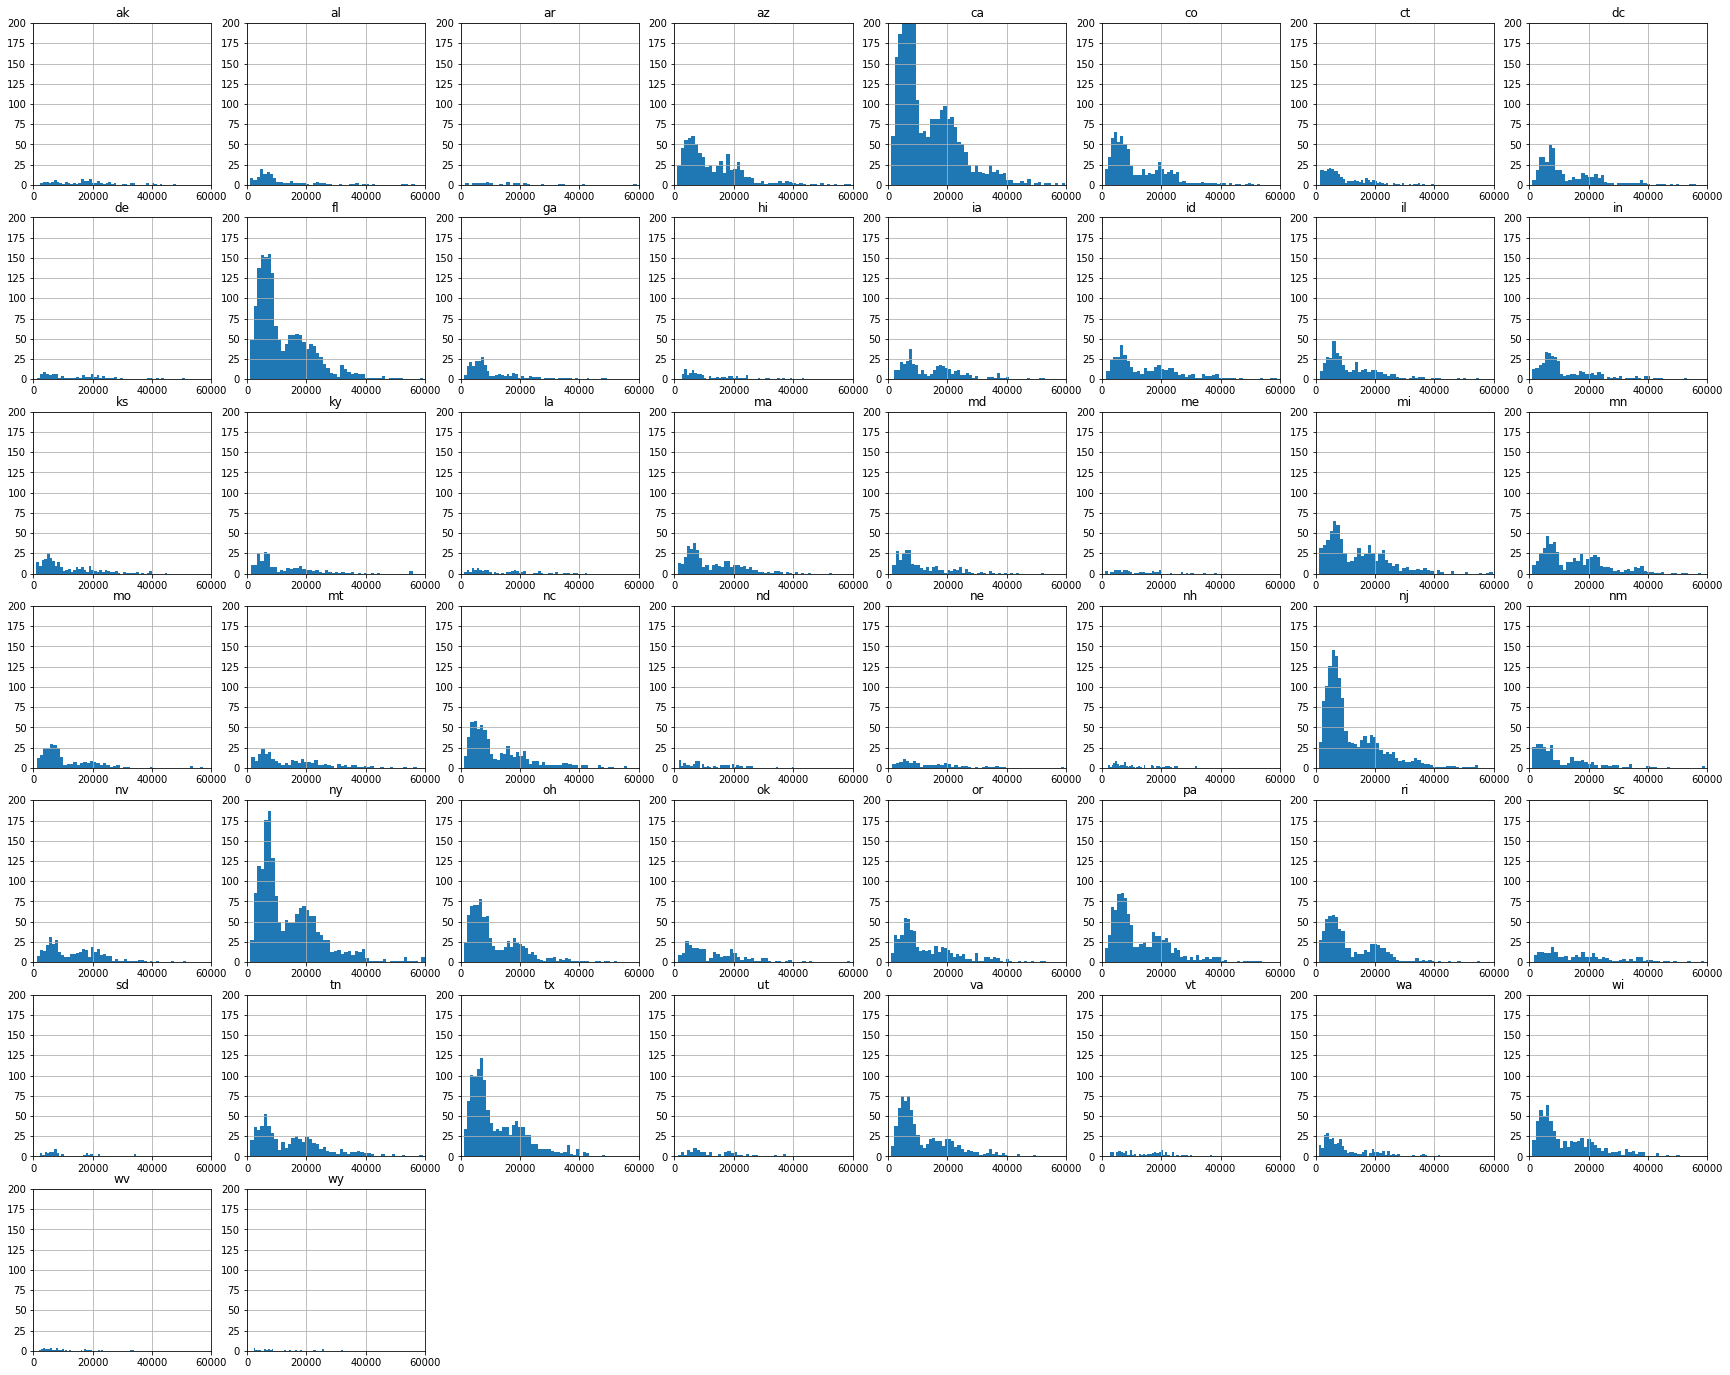

In [41]:
plot_box_bar_hist('state', train_df, (20, 3))